In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Step 2: Load dataset

In [105]:
data = pd.read_csv('airbnb_listing_train.csv')
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,price
0,11602914,Luxury home 100m2+garden in center!,3123809,Marjolein,NaN,De Pijp - Rivierenbuurt,52.35368,4.90177,Entire home/apt,3,13,15-02-2020,0.27,1,0,220
1,13289321,East is where your home is!,10259430,Ana,NaN,Oud-Oost,52.35728,4.92052,Entire home/apt,4,14,19-06-2019,0.29,1,0,110
2,40779315,Amsterdam Central - LUXURY house in BUSY STREET,224969266,Mark,NaN,Centrum-West,52.37582,4.89850,Entire home/apt,2,9,16-03-2020,1.65,1,7,100
3,7820311,great appartment down town,693472,Ayden,NaN,Westerpark,52.37792,4.87300,Entire home/apt,3,42,17-02-2020,0.72,1,0,130
4,27346603,Private room with canal view in peaceful area,41888346,Alissa,NaN,Westerpark,52.38051,4.87493,Private room,2,89,26-02-2020,4.02,1,24,90


## Step 3: Data Cleaning, Data Preprocessing

In [106]:
data.shape

(12901, 16)

In [107]:
data.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
price                               int64
dtype: object

In [108]:
data.isnull().sum()

id                                    0
name                                 22
host_id                               0
host_name                             8
neighbourhood_group               12901
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
minimum_nights                        0
number_of_reviews                     0
last_review                        1596
reviews_per_month                  1596
calculated_host_listings_count        0
availability_365                      0
price                                 0
dtype: int64

### Observation:
- neighbourhood_group column has 100% NaN value so removed it.
- fill the missing or NaN value in other column

In [109]:
data = data.drop('neighbourhood_group', axis=1)
data.head()

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,price
0,11602914,Luxury home 100m2+garden in center!,3123809,Marjolein,De Pijp - Rivierenbuurt,52.35368,4.90177,Entire home/apt,3,13,15-02-2020,0.27,1,0,220
1,13289321,East is where your home is!,10259430,Ana,Oud-Oost,52.35728,4.92052,Entire home/apt,4,14,19-06-2019,0.29,1,0,110
2,40779315,Amsterdam Central - LUXURY house in BUSY STREET,224969266,Mark,Centrum-West,52.37582,4.89850,Entire home/apt,2,9,16-03-2020,1.65,1,7,100
3,7820311,great appartment down town,693472,Ayden,Westerpark,52.37792,4.87300,Entire home/apt,3,42,17-02-2020,0.72,1,0,130
4,27346603,Private room with canal view in peaceful area,41888346,Alissa,Westerpark,52.38051,4.87493,Private room,2,89,26-02-2020,4.02,1,24,90


- missing value treatment

In [110]:
data.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'minimum_nights', 'number_of_reviews',
       'last_review', 'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'price'],
      dtype='object')

- 'name', 'host_name','last_review', 'reviews_per_month' has missing value

In [111]:
data['name'] = data['name'].fillna(data['name'].mode()[0])
data['host_name'] = data['host_name'].fillna(data['host_name'].mode()[0])
data['last_review'] = data['last_review'].fillna(data['last_review'].mode()[0])

data['reviews_per_month'] = data['reviews_per_month'].fillna(data['reviews_per_month'].mean())
data.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
price                             0
dtype: int64

### Observation:
- price is dependent/ Target variable
- check the relation between dependent and independent column/variable

In [112]:
# remove unnecessary column

data= data.drop(['last_review','latitude','longitude','name','host_name'],axis=1)
data.head()

,id,host_id,neighbourhood,room_type,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,price
0,11602914,3123809,De Pijp - Rivierenbuurt,Entire home/apt,3,13,0.27,1,0,220
1,13289321,10259430,Oud-Oost,Entire home/apt,4,14,0.29,1,0,110
2,40779315,224969266,Centrum-West,Entire home/apt,2,9,1.65,1,7,100
3,7820311,693472,Westerpark,Entire home/apt,3,42,0.72,1,0,130
4,27346603,41888346,Westerpark,Private room,2,89,4.02,1,24,90


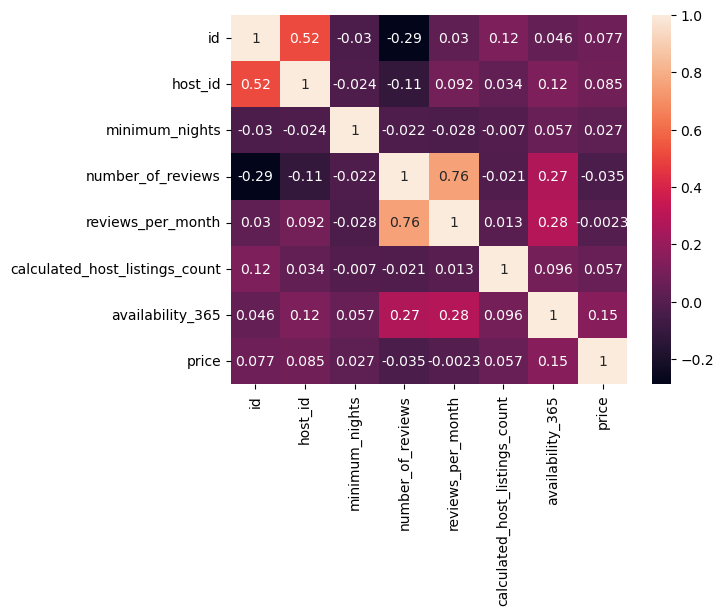

In [113]:
sns.heatmap(data.corr(),annot=True)
plt.show()

- here relation between number_of_reviews (independent variable) and price (dependent variable) is very less i.e. -0.035
- here relation between reviews_per_month (independent variable) and price (dependent variable) is very less i.e. -0.0023
- so remove these column

In [114]:
data = data.drop(['number_of_reviews','reviews_per_month'],axis=1)
data.head()

,id,host_id,neighbourhood,room_type,minimum_nights,calculated_host_listings_count,availability_365,price
0,11602914,3123809,De Pijp - Rivierenbuurt,Entire home/apt,3,1,0,220
1,13289321,10259430,Oud-Oost,Entire home/apt,4,1,0,110
2,40779315,224969266,Centrum-West,Entire home/apt,2,1,7,100
3,7820311,693472,Westerpark,Entire home/apt,3,1,0,130
4,27346603,41888346,Westerpark,Private room,2,1,24,90


### Apply Feature scaling and feature encoding

In [115]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss

StandardScaler()

In [116]:
data[['minimum_nights','calculated_host_listings_count','availability_365','price']] = ss.fit_transform(data[['minimum_nights','calculated_host_listings_count','availability_365','price']])
data.head()

,id,host_id,neighbourhood,room_type,minimum_nights,calculated_host_listings_count,availability_365,price
0,11602914,3123809,De Pijp - Rivierenbuurt,Entire home/apt,-0.035801,-0.189366,-0.568531,0.225910
1,13289321,10259430,Oud-Oost,Entire home/apt,0.030190,-0.189366,-0.568531,-0.242602
2,40779315,224969266,Centrum-West,Entire home/apt,-0.101793,-0.189366,-0.503706,-0.285194
3,7820311,693472,Westerpark,Entire home/apt,-0.035801,-0.189366,-0.568531,-0.157418
4,27346603,41888346,Westerpark,Private room,-0.101793,-0.189366,-0.346276,-0.327787


In [117]:
data[['id','host_id']] = ss.fit_transform(data[['id','host_id']])
data.head()

,id,host_id,neighbourhood,room_type,minimum_nights,calculated_host_listings_count,availability_365,price
0,-0.678042,-0.750180,De Pijp - Rivierenbuurt,Entire home/apt,-0.035801,-0.189366,-0.568531,0.225910
1,-0.539380,-0.661102,Oud-Oost,Entire home/apt,0.030190,-0.189366,-0.568531,-0.242602
2,1.720949,2.019252,Centrum-West,Entire home/apt,-0.101793,-0.189366,-0.503706,-0.285194
3,-0.989062,-0.780519,Westerpark,Entire home/apt,-0.035801,-0.189366,-0.568531,-0.157418
4,0.616462,-0.266259,Westerpark,Private room,-0.101793,-0.189366,-0.346276,-0.327787


In [118]:
data['room_type'].unique()

array(['Entire home/apt', 'Private room', 'Shared room', 'Hotel room'],
      dtype=object)

In [119]:
data_ohe = pd.get_dummies(data['room_type'])
data_ohe.head()

,Entire home/apt,Hotel room,Private room,Shared room
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,0,0,1,0


In [120]:
data = pd.concat([data,data_ohe], axis=1)
data.head()

,id,host_id,neighbourhood,room_type,minimum_nights,calculated_host_listings_count,availability_365,price,Entire home/apt,Hotel room,Private room,Shared room
0,-0.678042,-0.750180,De Pijp - Rivierenbuurt,Entire home/apt,-0.035801,-0.189366,-0.568531,0.225910,1,0,0,0
1,-0.539380,-0.661102,Oud-Oost,Entire home/apt,0.030190,-0.189366,-0.568531,-0.242602,1,0,0,0
2,1.720949,2.019252,Centrum-West,Entire home/apt,-0.101793,-0.189366,-0.503706,-0.285194,1,0,0,0
3,-0.989062,-0.780519,Westerpark,Entire home/apt,-0.035801,-0.189366,-0.568531,-0.157418,1,0,0,0
4,0.616462,-0.266259,Westerpark,Private room,-0.101793,-0.189366,-0.346276,-0.327787,0,0,1,0


In [121]:
data= data.drop('room_type', axis=1)
data.head()

,id,host_id,neighbourhood,minimum_nights,calculated_host_listings_count,availability_365,price,Entire home/apt,Hotel room,Private room,Shared room
0,-0.678042,-0.750180,De Pijp - Rivierenbuurt,-0.035801,-0.189366,-0.568531,0.225910,1,0,0,0
1,-0.539380,-0.661102,Oud-Oost,0.030190,-0.189366,-0.568531,-0.242602,1,0,0,0
2,1.720949,2.019252,Centrum-West,-0.101793,-0.189366,-0.503706,-0.285194,1,0,0,0
3,-0.989062,-0.780519,Westerpark,-0.035801,-0.189366,-0.568531,-0.157418,1,0,0,0
4,0.616462,-0.266259,Westerpark,-0.101793,-0.189366,-0.346276,-0.327787,0,0,1,0


In [122]:
data['neighbourhood'].unique()

array(['De Pijp - Rivierenbuurt', 'Oud-Oost', 'Centrum-West',
       'Westerpark', 'Centrum-Oost', 'De Baarsjes - Oud-West',
       'Noord-West', 'Bos en Lommer', 'De Aker - Nieuw Sloten',
       'Oostelijk Havengebied - Indische Buurt', 'Bijlmer-Centrum',
       'Watergraafsmeer', 'Slotervaart', 'Osdorp', 'Zuid',
       'Geuzenveld - Slotermeer', 'Oud-Noord', 'Buitenveldert - Zuidas',
       'IJburg - Zeeburgereiland', 'Noord-Oost', 'Gaasperdam - Driemond',
       'Bijlmer-Oost'], dtype=object)

In [123]:
#convert to category dtype
data['neighbourhood'] = data['neighbourhood'].astype('category')

In [124]:
#use .cat.codes to create new colums with encoded value
data['neighbourhood'] = data['neighbourhood'].cat.codes

In [125]:
data['neighbourhood'].value_counts()

7     2209
8     1600
5     1429
4     1097
20     958
21     924
17     831
2      730
14     644
19     381
16     376
11     321
18     269
13     257
12     171
3      155
10     144
6       88
15      83
9       80
0       78
1       76
Name: neighbourhood, dtype: int64

In [126]:
data.head()

,id,host_id,neighbourhood,minimum_nights,calculated_host_listings_count,availability_365,price,Entire home/apt,Hotel room,Private room,Shared room
0,-0.678042,-0.750180,8,-0.035801,-0.189366,-0.568531,0.225910,1,0,0,0
1,-0.539380,-0.661102,17,0.030190,-0.189366,-0.568531,-0.242602,1,0,0,0
2,1.720949,2.019252,5,-0.101793,-0.189366,-0.503706,-0.285194,1,0,0,0
3,-0.989062,-0.780519,20,-0.035801,-0.189366,-0.568531,-0.157418,1,0,0,0
4,0.616462,-0.266259,20,-0.101793,-0.189366,-0.346276,-0.327787,0,0,1,0


## Step 4: Separate X and Y

In [127]:
x= data.drop('price',axis=1)
y= data['price']

## Step 5: Split data into train and test set

In [128]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0)

## Step 6: Apply ML algorithm

In [129]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr

LinearRegression()

In [130]:
lr.fit(x_train, y_train)

LinearRegression()

## Step7: Prediction

In [132]:
y_pred = lr.predict(x_test)
y_pred

array([ 0.3553094 ,  0.072164  , -0.4239195 , ..., -0.00998758,
       -0.33807008,  0.25300539])

## Step 8: Evaluation

In [133]:
from sklearn.metrics import r2_score
accuracy = r2_score(y_test,y_pred)
accuracy

0.025771078849417872

In [138]:
0.025771078849417872*100

2.577107884941787

- accuracy is 2.5% 
- accuracy score is very low.
- Logistic Regression algorithm not suitable for this dataset.

In [139]:
from sklearn.model_selection import cross_val_score
cross_val_score(lr,x,y,cv=5)

array([0.04862811, 0.06599158, 0.02829064, 0.05190067, 0.02977489])

In [ ]:
1st acuracy = 4.8% 2nd accuracy = 6.5% 3rd accuracy = 2.8% 4th accuracy = 5.2% 5th accuracy = 3%

Out of all 5 accuracies is very low.